In [1]:
import numpy as np

In [68]:
class vanillaGrad(object):
    def __init__(self,weight_shape, learning_rate=0.1, C=0, loss_function="MSE"):
        self.weights = np.array(np.random.randn(weight_shape +1), ndmin=2)#adding the one extra weight parameter (the bias term)
        self.lr = learning_rate
        self.loss = loss_function
        self.history = {}
        self.C = C# parameter that controls the amount of regulaarization

    def update_w(self, X, y):
        #adding one extra column of 1's to the feature set 
        dl_dw = 0
        dl_db = 0 #change in bias term
        
        
        N = len(X)
            #looping over all the training data
        for i in range(N):
            x = np.array(X[i], ndmin=2).T
            np.dot(self.weights, x)  

            if self.loss == "MSE":  
                error_term = -2 * (y[i] - np.dot(self.weights, x))                          
                dl_dw += (x[:-1] * error_term)
                dl_db += error_term
                #te derivative of the regularization term wrt weight 
                dl_dw_reg = self.C * np.sum(self.weights)
                
            
            #to use absolute loss function in future 
            else:
                 print("Only MSE allowed for now")
                
        #since the bias is the last term in the weight matrix dl_dw used to update terms upto the second last 
        #dividing by N to average the loss
        print(self.weights[0][:-1], dl_dw)
        self.weights[0][:-1] -= 1/N * ((self.lr * dl_dw.T) + dl_dw_reg)
        self.weights[0][-1] -= 1/N * self.lr * dl_db

        return self.weights

    def average_loss(self, X, y):
            X = np.array(X, ndmin=2)
            total_error = 0.0
            N = len(X)
            for i in range(N):
                x = X[i].T
                if self.loss == "MSE":
                    total_error += (y[i] - np.dot(self.weights, x)) **2 
                #to use absolute loss funct in future
                else:
                     print("Only MSE allowed for now")
                
            return total_error / float(N)

        
    def train(self, X, y, epochs):
        for epoch in range(epochs):
                #update the weights
                self.update_w(X, y)
                #calculate the loss for the epoch 
                self.history[epoch] = self.average_loss(X, y)

                print(f"Epoch {epoch} / {epochs}: loss {self.history[epoch]}")
    
    def test(self, X,y):
         #return the MSE
         MSE = self.average_loss(X, y)
         predicted = [np.dot(self.weights, x) for x in X]
         predicted = list(predicted)
         return predicted, MSE
              
              

In [32]:
#generating data 
X = np.random.rand(500, 1)
#generate ones and reshape 
ones = np.ones(len(X)).reshape(-1,1)
X = np.append(X, ones, axis=1)
y = []
# y = 2x1 + 3x2
for x in X:
    #the bias term is 2
    y.append(2*x[0] + 2)

#split the dataset into train and test set 
X_train, X_test, y_train, y_test = X[:70], X[70:], y[:70], y[70:]

In [69]:
#create instance of the model
network = vanillaGrad(1, 0.3, 1)
network.weights[0]

array([-0.85825527, -1.30801141])

In [70]:
#train the model
network.train(X_train, y_train, epochs=5)


[-0.85825527] [[-408.05018238]]


ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,1)

In [81]:
import matplotlib.pyplot as plt 

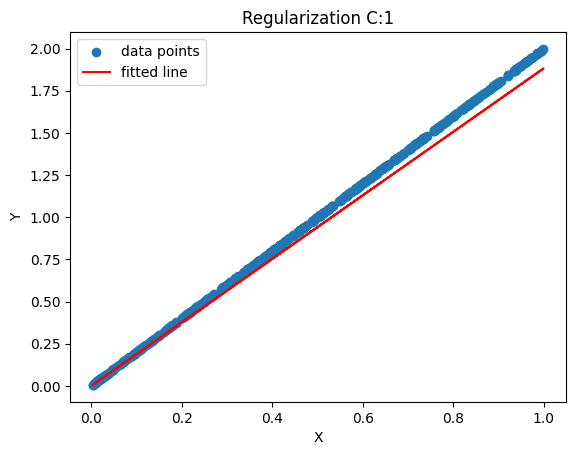

In [82]:
fitted_line, _ = network.test(X_test, y_test)
plt.scatter(X_test, y_test, label="data points")
plt.plot(X_test, fitted_line, color="red", label="fitted line")
plt.title(f"Regularization C:{network.C}")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [73]:
np.array([-0.85825527]) + np.array([-408.05018238])

array([-408.90843765])